Authors
*   Dhruv Lalani
*   Kumar Jayant

### Part 1: Library Imports, installations, data ingestion, dataframe creation and basic dataframe viewing

In [ ]:
# !pip install shap
# !pip install lime
!pip install kmodes

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from kmodes.kprototypes import KPrototypes

In [ ]:
# Load the data
file_path = "/content/Employee_Performance_Imputed_Distribution.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EmpNumber                                       1200 non-null   object 
 1   Age                                             1200 non-null   int64  
 2   Gender                                          1200 non-null   object 
 3   EducationBackground                             1200 non-null   object 
 4   MaritalStatus                                   1200 non-null   object 
 5   EmpDepartment                                   1200 non-null   object 
 6   EmpJobRole                                      1200 non-null   object 
 7   BusinessTravelFrequency                         1200 non-null   object 
 8   DistanceFromHome                                1200 non-null   int64  
 9   EmpEducationLevel                        

In [ ]:
df1.describe(include='all')

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,Avg. sales value,Avg. customer feedback,Salary per Annum lacs,Conversion rate,% of sales from high value products,No. of interactions per customer,Product knowledge score,Customers attended M vs F,Number of dependants,Financial obligations
count,1200,1200.000000,1200,1200,1200,1200,1200,1200,1200.000000,1200.00000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
unique,1200,NaN,2,8,3,2,5,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,E100998,NaN,Male,Science,Married,Sales - Off role,Sales Promoter,Travel_Rarely,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,725,272,548,1071,753,846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.918333,NaN,NaN,NaN,NaN,NaN,NaN,9.165833,2.89250,...,80787.741050,3.822792,173403.234167,0.282925,0.494867,2.510050,70.086142,0.497617,2.691667,0.093333
std,NaN,9.087289,NaN,NaN,NaN,NaN,NaN,NaN,8.176636,1.04412,...,66695.893005,0.581577,61183.687363,0.158787,0.193242,0.785187,15.083974,0.153495,1.382579,0.291020
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,...,6309.890000,2.010000,100000.000000,0.000000,0.020000,1.000000,17.960000,0.100000,1.000000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.00000,...,39091.847500,3.407500,128109.000000,0.160000,0.360000,1.940000,60.325000,0.390000,1.000000,0.000000
50%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.00000,...,60499.895000,3.850000,160467.500000,0.270000,0.500000,2.490000,70.300000,0.500000,3.000000,0.000000
75%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,4.00000,...,100298.917500,4.220000,202719.750000,0.380000,0.640000,3.050000,80.260000,0.600000,4.000000,0.000000


In [ ]:
# Check for missing values
df1.isnull().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


### Part 2: Finding Clusters to act as pseudo labels

Creating Clusters for the synthetic dataset.

We will be using KPrototypes (instead of plain Kmeans since our data is a mix of numerical and categorical datatypes and we wish to avoid encoding).

We will be taking the following steps:

1. Using elbow method to find optimal number of clusters
2. Using KPrototypes to cluster the data

In [ ]:
# Identify all columns with object datatype (typically categorical)
cat_columns = df1.select_dtypes(include=['object']).columns.tolist()

# Get their column indices for KPrototypes
cat_column_indices = [df1.columns.get_loc(col) for col in cat_columns]

for col in cat_columns:
    df1[col] = df1[col].astype(str)

X = df1.values

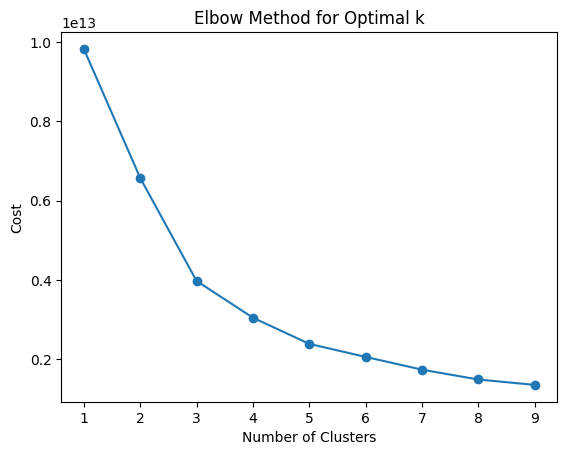

In [ ]:
cost = []
for k in range(1, 10):
    kproto = KPrototypes(n_clusters=k, init='Cao')
    clusters = kproto.fit_predict(X, categorical=cat_column_indices)
    cost.append(kproto.cost_)

import matplotlib.pyplot as plt
plt.plot(range(1, 10), cost, marker = "o")
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()

5 is a reasonable number of cluster to assume.

In the next step we will go ahead with 5 clusters

In [ ]:
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(X, categorical=cat_column_indices)

# Adding cluster IDs back to the DataFrame and present the new dataset
df1['Cluster_ID'] = clusters

df1.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,Avg. customer feedback,Salary per Annum lacs,Conversion rate,% of sales from high value products,No. of interactions per customer,Product knowledge score,Customers attended M vs F,Number of dependants,Financial obligations,Cluster_ID
0,E1001000,32,Male,Marketing,Single,Sales - Off role,Sales Promoter,Travel_Rarely,10,3,...,3.78,195769.0,0.10,0.23,1.96,79.50,0.42,4,0,1
1,E1001006,47,Male,Marketing,Single,Sales - Off role,Sales Promoter,Travel_Rarely,14,4,...,2.87,212194.0,0.47,0.45,1.73,66.96,0.41,3,0,1
2,E1001007,40,Male,Engineering,Married,Sales - Off role,Sales Promoter,Travel_Frequently,5,4,...,3.72,173590.0,0.29,0.15,1.63,74.00,0.42,2,0,3
3,E1001009,41,Male,Human Resources,Divorced,Sales - Off role,Senior PromoterÊ,Travel_Rarely,10,4,...,4.40,109538.0,0.27,0.29,4.74,65.88,0.35,5,0,2
4,E1001010,60,Male,Marketing,Single,Sales - Off role,Sales Promoter,Travel_Rarely,16,4,...,3.16,105672.0,0.17,0.82,2.65,66.27,0.51,1,1,4


In [ ]:
# Summarising means for all the numerical columns for the 5 clusters for observation and possible dscriptive analytics

# Listing all numerical columns
num_columns = df1.select_dtypes(include=[float, int]).columns.tolist()

# Group by the cluster ID and compute mean for all numerical columns
cluster_means = df1.groupby('Cluster_ID')[num_columns].mean()

cluster_means


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,Avg. sales value,Avg. customer feedback,Salary per Annum lacs,Conversion rate,% of sales from high value products,No. of interactions per customer,Product knowledge score,Customers attended M vs F,Number of dependants,Financial obligations
Cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,38.000000,11.928571,2.767857,2.866071,70.732143,2.714286,2.571429,2.714286,15.187500,2.830357,...,73179.302411,3.872143,309177.660714,0.283125,0.510982,2.518839,69.328482,0.497232,2.526786,0.125000
1,36.700831,8.836565,2.905817,2.686981,66.254848,2.731302,2.759003,2.684211,15.254848,2.736842,...,54239.563352,3.799972,202108.786704,0.280443,0.491108,2.526205,70.625596,0.499363,2.753463,0.108033
2,36.942857,10.885714,3.257143,2.742857,66.200000,2.857143,2.571429,2.800000,15.085714,2.771429,...,342581.973429,3.871143,168917.028571,0.316857,0.473429,2.590286,73.071714,0.489429,2.942857,0.028571
3,36.786096,9.368984,2.877005,2.647059,63.390374,2.716578,2.786096,2.529412,15.203209,2.689840,...,155373.014652,3.822460,158319.577540,0.290909,0.503369,2.530160,70.588824,0.511283,2.684492,0.085561
4,36.881188,8.594059,2.891089,2.726733,65.677228,2.732673,2.740594,2.681188,15.223762,2.702970,...,55690.301406,3.824931,128667.037624,0.279347,0.492317,2.483545,69.475485,0.491960,2.669307,0.083168


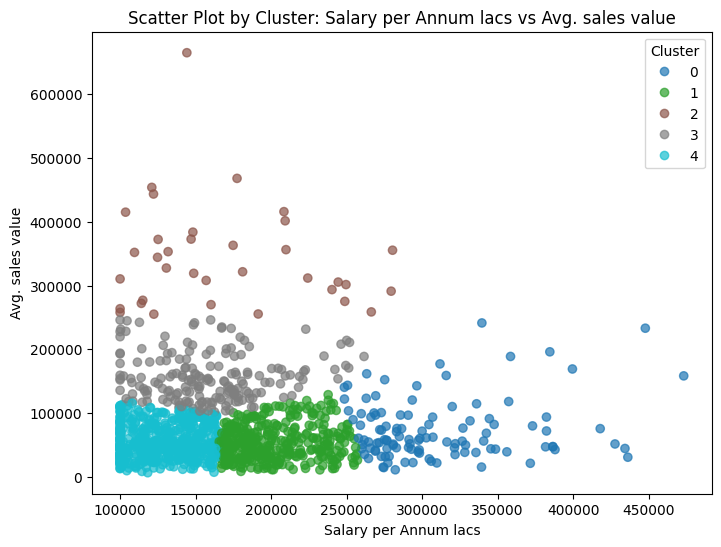

In [ ]:
# Scatter plot by clusters with two columns for visual representation

x_col = 'Salary per Annum lacs'
y_col = 'Avg. sales value'

plt.figure(figsize=(8,6))
scatter = plt.scatter(df1[x_col], df1[y_col], c=df1['Cluster_ID'], cmap='tab10', alpha=0.7)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Scatter Plot by Cluster: {} vs {}'.format(x_col, y_col))
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

**Cluster Profiles**

Cluster 0 (teal): Low salary and low–mid sales; broad spread in sales but mostly below midrange.

Cluster 1 (green): Low salary and consistently low sales; compact, low-performing group.

Cluster 2 (brown): Mid salary and mid sales; dense band, representing stable, average performers.

Cluster 3 (grey): Highest salaries with mostly low–mid sales; relatively few points but very costly.

Cluster 4 (blue): Low–mid salaries with the highest and most dispersed sales values, including extreme high-sales outliers.

**Potential commercial Outcomes**

Cluster 0: Acceptable ROI but not outstanding; focus on upskilling and process support to lift sales without big pay increases.

Cluster 1: Low ROI segment; candidates for performance improvement plans, redeployment, or role redesign.

Cluster 2: Core engine of the field force; invest in targeted training and best-practice sharing to push them toward Cluster 4 performance.

Cluster 3: Negative or weak ROI; prioritize diagnostic reviews, territory/role changes, or compensation realignment to justify high cost.

Cluster 4: Highest ROI group; protect and reward, use as benchmark for hiring, coaching, and incentive design, and study their behaviors to replicate success across other clusters.

### Part 3: Feature Importances

Now we have a dataframe with Cluster ID which shall act as 'pseudo labels' when we use supervised learning algorithms and then feature ranks to find out the most important features contributing to the outcome

In [ ]:
# Isolating categorical features for encoding
# Since we have both nominal and ordinal features we shall be using label encoding for ordinal and OHE for nominal features.
# Nominal features: Gender, MaritalStatus, EmpDepartment, EmpJobRole, Attrition
# Ordinal features: EducationBackground, BusinessTravelFrequency, OverTime

onehot_cols = ['Gender', 'MaritalStatus', 'EmpDepartment', 'Attrition']
label_cols = ['EducationBackground', 'BusinessTravelFrequency', 'OverTime', 'EmpJobRole']

In [ ]:
# Label encoding code block

for col in label_cols:
    le = LabelEncoder()
    df1[col + '_le'] = le.fit_transform(df1[col].astype(str))

# Each encoded column has suffix of '_le' to ensure identifiability of being label encoded

In [ ]:
# OHE code block

df1 = pd.get_dummies(df1, columns=onehot_cols, drop_first=False)

# Do note that we are retaining all the encoded columns. This is beacuse we shall be using all tree base algorithms.
# Dropping one encoded column is needed for regression to avoid perfect collinearity


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EmpNumber                                       1200 non-null   object 
 1   Age                                             1200 non-null   int64  
 2   EducationBackground                             1200 non-null   object 
 3   EmpJobRole                                      1200 non-null   object 
 4   BusinessTravelFrequency                         1200 non-null   object 
 5   DistanceFromHome                                1200 non-null   int64  
 6   EmpEducationLevel                               1200 non-null   int64  
 7   EmpEnvironmentSatisfaction                      1200 non-null   int64  
 8   EmpHourlyRate                                   1200 non-null   int64  
 9   EmpJobInvolvement                        

In [ ]:
# Preserving original dataframe for merging in future and dropping
df2 = df1.copy()

# Define the features (X) and the target variable (y) for supervised learning algorithms

X = df1.drop(['Cluster_ID', 'EmpNumber', 'EducationBackground', 'BusinessTravelFrequency', 'OverTime', 'EmpJobRole'], axis=1)
y = df1['Cluster_ID']

# Check the original class distribution to see split among cluster IDs
print("Original Class Distribution:")
print(y.value_counts(normalize=True))
print("-" * 50)

Original Class Distribution:
Cluster_ID
4    0.420833
1    0.300833
3    0.155833
0    0.093333
2    0.029167
Name: proportion, dtype: float64
--------------------------------------------------


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EmpNumber                                       1200 non-null   object 
 1   Age                                             1200 non-null   int64  
 2   EducationBackground                             1200 non-null   object 
 3   EmpJobRole                                      1200 non-null   object 
 4   BusinessTravelFrequency                         1200 non-null   object 
 5   DistanceFromHome                                1200 non-null   int64  
 6   EmpEducationLevel                               1200 non-null   int64  
 7   EmpEnvironmentSatisfaction                      1200 non-null   int64  
 8   EmpHourlyRate                                   1200 non-null   int64  
 9   EmpJobInvolvement                        

In [ ]:
# Splitting the dataset into train and test holds bo great meaning for this project
# Since we are only looking for feature importances and not the accuracy of the prediction
# We shall still howeever split in 90-10 ratio with stratification
# Stratification ensures that we have equal split across classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


print("Training Set Class Distribution (Before Oversampling):")
print(y_train.value_counts(normalize=True))

Training Set Class Distribution (Before Oversampling):
Cluster_ID
4    0.421296
1    0.300926
3    0.155556
0    0.093519
2    0.028704
Name: proportion, dtype: float64


Model 1: Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

pred_y = rf_classifier.predict(X_test)

print('Test Accuracy')
print(accuracy_score(y_test, pred_y))
print(metrics.classification_report(y_test, pred_y))

print('Train Accuracy')
pred_y = rf_classifier.predict(X_train)
print(accuracy_score(y_train, pred_y))
print(metrics.classification_report(y_train, pred_y))

Test Accuracy
0.9416666666666667
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.99        36
           2       0.00      0.00      0.00         4
           3       0.81      0.89      0.85        19
           4       0.96      1.00      0.98        50

    accuracy                           0.94       120
   macro avg       0.75      0.76      0.75       120
weighted avg       0.91      0.94      0.93       120

Train Accuracy
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       325
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       455

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Explainable AI Part commences here. We are looking for strongest contributing features to the outcome.

Top Contributing features from Random Forest Classifier

/tmp/ipython-input-339827358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')


Text(0, 0.5, 'Feature')

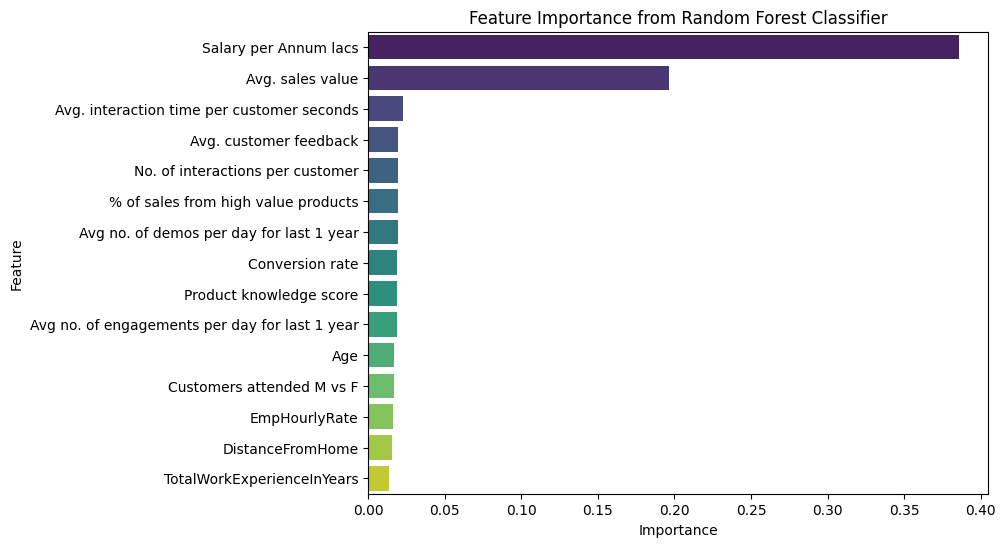

In [ ]:
feature_rank = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_classifier.feature_importances_})
feature_rank = feature_rank.sort_values(by='Importance', ascending=False)

feature_rank = feature_rank[:15]

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')
# sns.barplot(x='Importance', y='Feature', data=feature_rank)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [ ]:
# Cumulative Rank
feature_rank['cumsum'] = feature_rank.Importance.cumsum()*100
feature_rank.head(15)

,Feature,Importance,cumsum
24,Salary per Annum lacs,0.385515,38.551470
22,Avg. sales value,0.196377,58.189145
20,Avg. interaction time per customer seconds,0.023044,60.493527
23,Avg. customer feedback,0.019793,62.472869
27,No. of interactions per customer,0.019552,64.428026
26,% of sales from high value products,0.019534,66.381408
19,Avg no. of demos per day for last 1 year,0.019269,68.308324
25,Conversion rate,0.018941,70.202388
28,Product knowledge score,0.018843,72.086659
18,Avg no. of engagements per day for last 1 year,0.018772,73.963811


Conclusion: Top 15 features contribute 80% of the information wrt to the output variable

Model 2: Gradient Boosting

Contribution of each of the features to the outcome - using Global Shapley first.

LinearExplainer is used for Logistic Regression and Linear Regression.

explainer = shap.LinearExplainer(rf_classifier, X_train, feature_perturbation="interventional")

For Tree based models TreeExplainer is used. Tree based explainers don't use feature perturbation

In [ ]:
gboost_clf = GradientBoostingClassifier(n_estimators = 500, max_depth = 10, random_state=42)

# Fit the classifier to the training data
gboost_clf.fit(X_train, y_train)

print('Train Accuracy')
pred_y = gboost_clf.predict(X_train)
print(accuracy_score(y_train, pred_y))
print(metrics.classification_report(y_train, pred_y))

print('Test Accuracy')
pred_y = gboost_clf.predict(X_test)
print(accuracy_score(y_test, pred_y))
print(metrics.classification_report(y_test, pred_y))

Train Accuracy
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       325
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       455

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080

Test Accuracy
0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        50

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99  

Top Contributing features per the Gradient Boosting Algorithm

/tmp/ipython-input-3116242855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')


Text(0, 0.5, 'Feature')

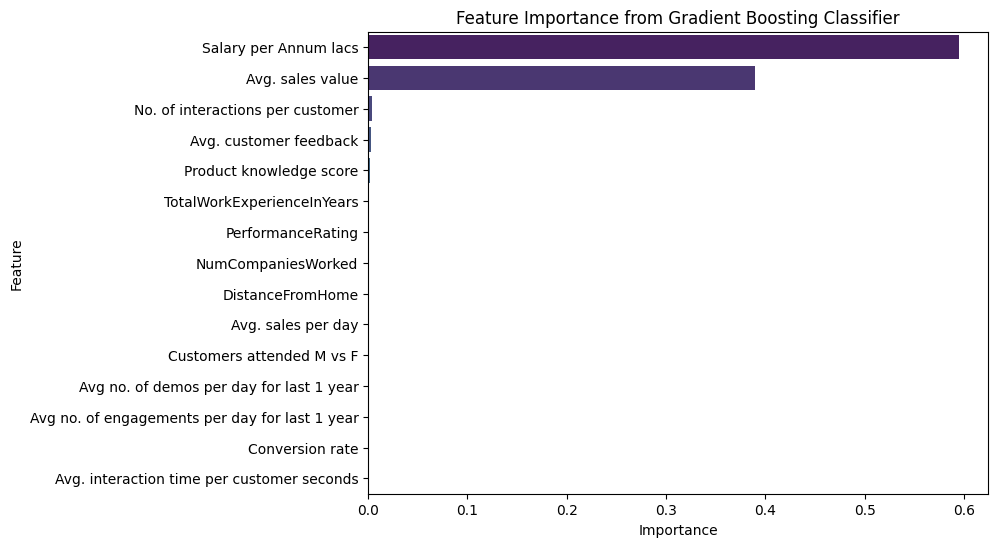

In [ ]:
feature_rank = pd.DataFrame({'Feature': X_train.columns, 'Importance': gboost_clf.feature_importances_})
feature_rank = feature_rank.sort_values(by='Importance', ascending=False)

feature_rank = feature_rank[:15]

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')
# sns.barplot(x='Importance', y='Feature', data=feature_rank)
plt.title('Feature Importance from Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [ ]:
# Cumulative Rank
feature_rank['cumsum'] = feature_rank.Importance.cumsum()*100
feature_rank.head(15)

,Feature,Importance,cumsum
24,Salary per Annum lacs,0.594592,59.459214
22,Avg. sales value,0.389518,98.410994
27,No. of interactions per customer,0.004175,98.828477
23,Avg. customer feedback,0.002697,99.098160
28,Product knowledge score,0.001868,99.284954
10,TotalWorkExperienceInYears,0.000835,99.368465
17,PerformanceRating,0.000701,99.438530
7,NumCompaniesWorked,0.000692,99.507728
1,DistanceFromHome,0.000635,99.571277
21,Avg. sales per day,0.000625,99.633818


Conclusion: Top 15 features contribute >99% of the information wrt to the output variable

Model 3: Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees Classifier
extra_clf = ExtraTreesClassifier(n_estimators=500, max_depth=10, random_state=42)
extra_clf.fit(X_train, y_train)

print('Train Accuracy')
pred_y = gboost_clf.predict(X_train)
print(accuracy_score(y_train, pred_y))
print(metrics.classification_report(y_train, pred_y))

print('Test Accuracy')
pred_y = gboost_clf.predict(X_test)
print(accuracy_score(y_test, pred_y))
print(metrics.classification_report(y_test, pred_y))

Train Accuracy
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       325
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       455

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080

Test Accuracy
0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        50

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99  

/tmp/ipython-input-4271891533.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')


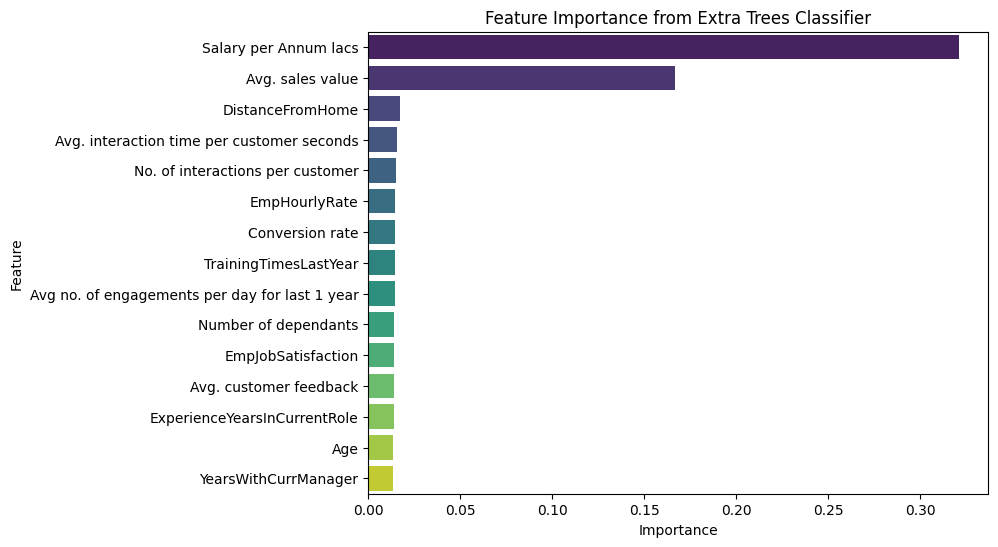

In [ ]:
# Feature importances
feature_rank = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': extra_clf.feature_importances_
})
feature_rank = feature_rank.sort_values(by='Importance', ascending=False)
feature_rank = feature_rank.head(15)

# Plot top 15 most important features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')
plt.title('Feature Importance from Extra Trees Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Cumulative Rank
feature_rank['cumsum'] = feature_rank.Importance.cumsum()*100
feature_rank.head(25)

,Feature,Importance,cumsum
24,Salary per Annum lacs,0.320907,32.090675
22,Avg. sales value,0.166793,48.770008
1,DistanceFromHome,0.017470,50.517033
20,Avg. interaction time per customer seconds,0.015751,52.092152
27,No. of interactions per customer,0.015144,53.606537
4,EmpHourlyRate,0.014626,55.069114
25,Conversion rate,0.014559,56.525033
11,TrainingTimesLastYear,0.014460,57.971028
18,Avg no. of engagements per day for last 1 year,0.014449,59.415977
30,Number of dependants,0.014120,60.828026


Conclusion: Top 15 features contribute >99% of the information wrt to the output variable

Model 4: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression (for multiclass, use multinomial option)
logreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logreg_clf.fit(X_train, y_train)

# Evaluate model
print('Train Accuracy')
pred_y_train = logreg_clf.predict(X_train)
print(accuracy_score(y_train, pred_y_train))
print(metrics.classification_report(y_train, pred_y_train))

print('Test Accuracy')
pred_y_test = logreg_clf.predict(X_test)
print(accuracy_score(y_test, pred_y_test))
print(metrics.classification_report(y_test, pred_y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Train Accuracy
0.7833333333333333
              precision    recall  f1-score   support

           0       0.79      0.48      0.59       101
           1       0.72      0.80      0.76       325
           2       0.58      0.68      0.63        31
           3       0.80      0.79      0.80       168
           4       0.84      0.84      0.84       455

    accuracy                           0.78      1080
   macro avg       0.75      0.72      0.72      1080
weighted avg       0.79      0.78      0.78      1080

Test Accuracy
0.775
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.73      0.75      0.74        36
           2       0.60      0.75      0.67         4
           3       0.76      0.84      0.80        19
           4       0.84      0.84      0.84        50

    accuracy                           0.78       120
   macro avg       0.73      0.73      0.72       120
weighted avg       0.78

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/tmp/ipython-input-99949913.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')


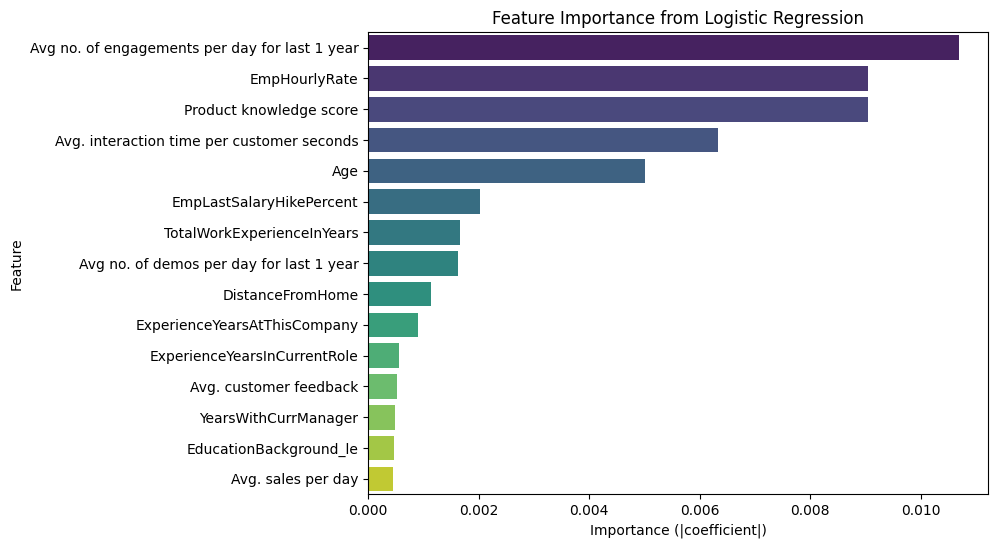

In [ ]:
# Feature importances: take mean absolute across classes if multiclass
coef = logreg_clf.coef_
if coef.ndim > 1:  # multiclass case
    importances = np.mean(np.abs(coef), axis=0)
else:
    importances = np.abs(coef).flatten()

feature_rank = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
feature_rank = feature_rank.sort_values(by='Importance', ascending=False)
feature_rank = feature_rank.head(15)

# Plot top 15 most important features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance (|coefficient|)')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Cumulative Rank
feature_rank['cumsum'] = feature_rank.Importance.cumsum()*100
feature_rank.head(25)

,Feature,Importance,cumsum
18,Avg no. of engagements per day for last 1 year,0.010690,1.068968
4,EmpHourlyRate,0.009057,1.974645
28,Product knowledge score,0.009040,2.878683
20,Avg. interaction time per customer seconds,0.006340,3.512655
0,Age,0.005013,4.013976
8,EmpLastSalaryHikePercent,0.002027,4.216688
10,TotalWorkExperienceInYears,0.001659,4.382550
19,Avg no. of demos per day for last 1 year,0.001629,4.545457
1,DistanceFromHome,0.001143,4.659748
13,ExperienceYearsAtThisCompany,0.000898,4.749562


Conclusion: Top 15 features contribute are being listed above. Since these are coefficients hence cumulative sum doesn't hold relevance

Model 5: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)

# Evaluate model
print('Train Accuracy')
pred_y_train = tree_clf.predict(X_train)
print(accuracy_score(y_train, pred_y_train))
print(metrics.classification_report(y_train, pred_y_train))

print('Test Accuracy')
pred_y_test = tree_clf.predict(X_test)
print(accuracy_score(y_test, pred_y_test))
print(metrics.classification_report(y_test, pred_y_test))

Train Accuracy
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       325
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       455

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080

Test Accuracy
0.9583333333333334
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.97      0.97      0.97        36
           2       1.00      0.75      0.86         4
           3       0.90      0.95      0.92        19
           4       1.00      1.00      1.00        50

    accuracy                           0.96       120
   macro avg       0.94      0.90      0.91       120
weighted avg       0.96  

/tmp/ipython-input-1801444763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')


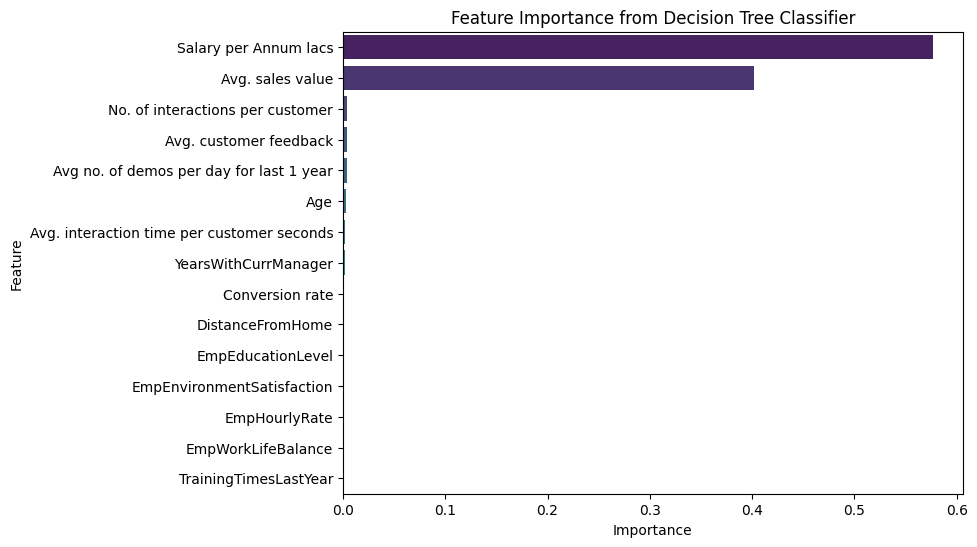

In [ ]:
# Feature importances
feature_rank = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_clf.feature_importances_
})
feature_rank = feature_rank.sort_values(by='Importance', ascending=False)
feature_rank = feature_rank.head(15)

# Plot top 15 most important features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_rank, palette='viridis')
plt.title('Feature Importance from Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Cumulative Rank
feature_rank['cumsum'] = feature_rank.Importance.cumsum()*100
feature_rank.head(25)

,Feature,Importance,cumsum
24,Salary per Annum lacs,0.577119,57.711909
22,Avg. sales value,0.402075,97.919405
27,No. of interactions per customer,0.004244,98.343785
23,Avg. customer feedback,0.003893,98.733089
19,Avg no. of demos per day for last 1 year,0.003538,99.086875
0,Age,0.003315,99.418422
20,Avg. interaction time per customer seconds,0.002500,99.668453
16,YearsWithCurrManager,0.001989,99.867381
25,Conversion rate,0.001326,100.000000
1,DistanceFromHome,0.000000,100.000000


Conclusion: Top 9 features contribute nearly explain 100% variation in the outcome

Model 6: Final Model Stacking

**Stacking:** Using Stacking to out best performing models together

In [ ]:
# Define base learners

# define base classifier with logistic regressin to be used with Adaboost
logreg_clf = LogisticRegression(random_state=42)

estimators = [
    ('lr', LogisticRegression(random_state=42, max_iter=5000)),
    ('knn', KNeighborsClassifier(n_neighbors=18)),
    ('rfc', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gboost', GradientBoostingClassifier(n_estimators = 500, max_depth = 10, random_state=42)),
    # AdaBoost with Logistic Regression as the base estimator
    ('ada_clf', AdaBoostClassifier(logreg_clf, n_estimators=100, random_state=42))
]

# Define meta learner
meta_learner = LogisticRegression(random_state=42, max_iter=5000)

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

In [ ]:
# Fit the classifier to the training data
stacking_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('lr',
                                LogisticRegression(max_iter=5000,
                                                   random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=18)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('gboost',
                                GradientBoostingClassifier(max_depth=10,
                                                           n_estimators=500,
                                                           random_state=42)),
                               ('ada_clf',
                                AdaBoostClassifier(estimator=LogisticRegression(random_state=42),
                                                   n_estimators=100,
                                                   random_state=42))],
                   final_estimator=LogisticRegression(max_iter=5000,
                                                      random_state=42))

In [ ]:
print('Train Accuracy')
pred_y = stacking_clf.predict(X_train)
print(accuracy_score(y_train, pred_y))
print(metrics.classification_report(y_train, pred_y))

print('Test Accuracy')
pred_y = stacking_clf.predict(X_test)
print(accuracy_score(y_test, pred_y))
print(metrics.classification_report(y_test, pred_y))

Train Accuracy
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       325
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       455

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080

Test Accuracy
0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        50

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99  

Creating Feature Importance for Stacking model. Since it doesn't have a feature explainer built in we will take the help of SHAP

In [2]:
background_indices = np.random.choice(X_train.shape[0], size=100, replace=False)
X_train_subset = X_train.iloc[background_indices]  # Use .iloc for row selection by index
explainer_stacking = shap.KernelExplainer(stacking_clf.predict_proba, X_train_subset)

NameError: name 'np' is not defined

In [ ]:
test_indices = np.random.choice(X_test.shape[0], size=100, replace=False)
X_test_subset = X_test.iloc[test_indices]  # Use .iloc for row selection
shap_values = explainer_stacking.shap_values(X_test_subset)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/p

In [1]:
print("Shape of X_test_subset:", X_test_subset.shape)
print("Shape of shap_values:", np.array(shap_values).shape)

NameError: name 'X_test_subset' is not defined

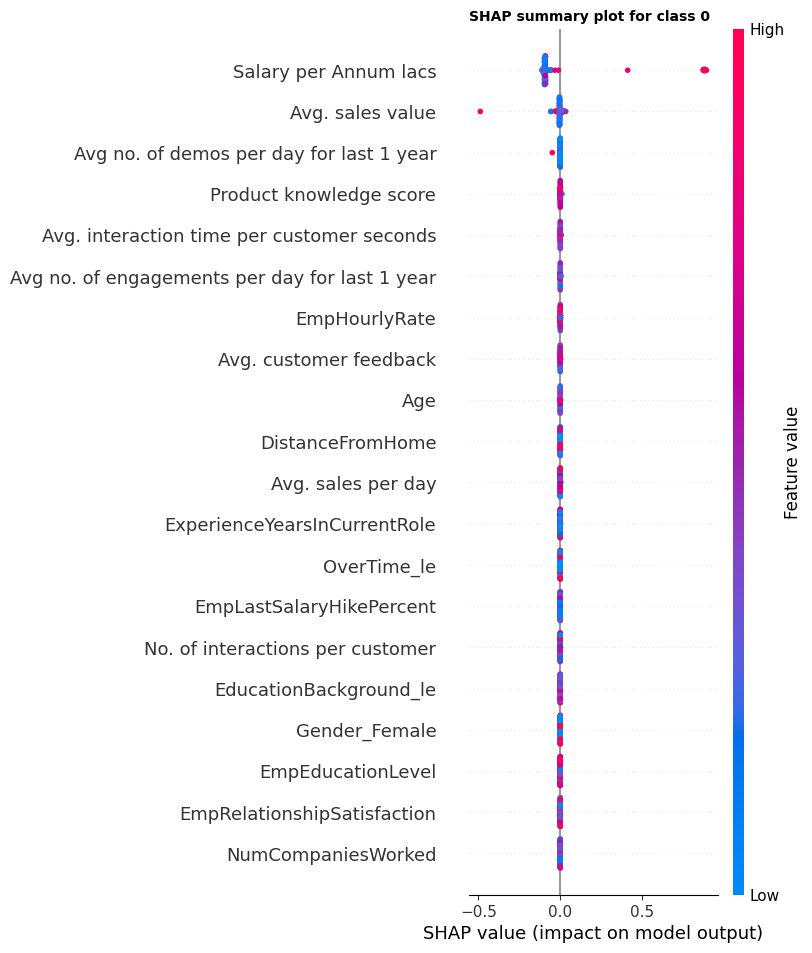

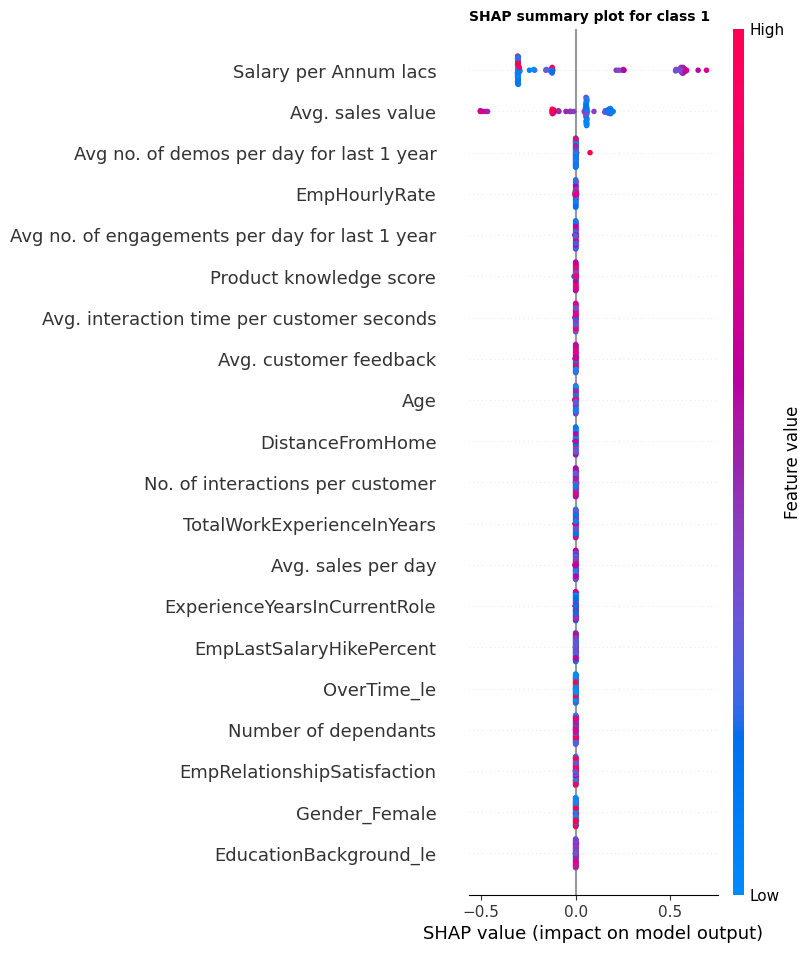

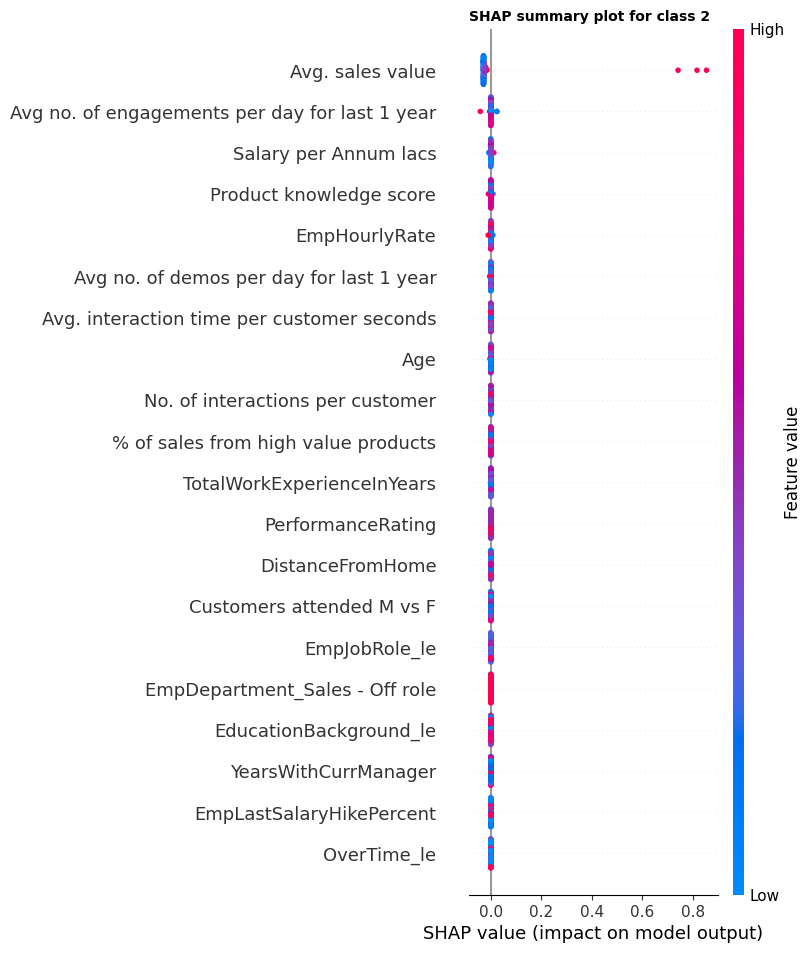

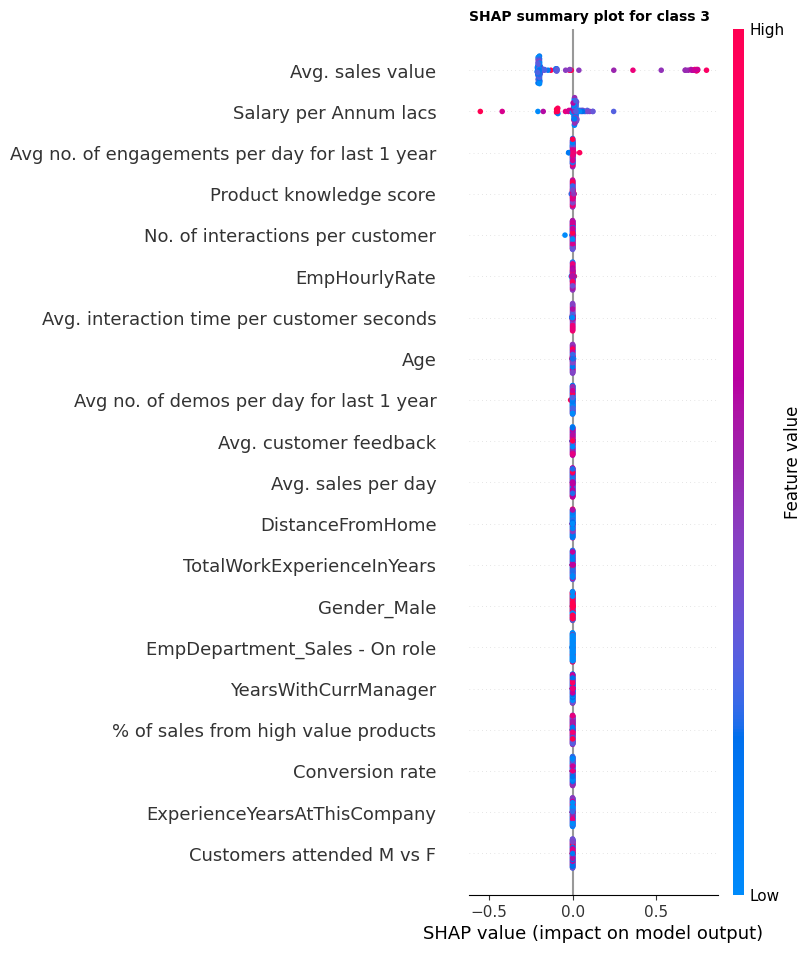

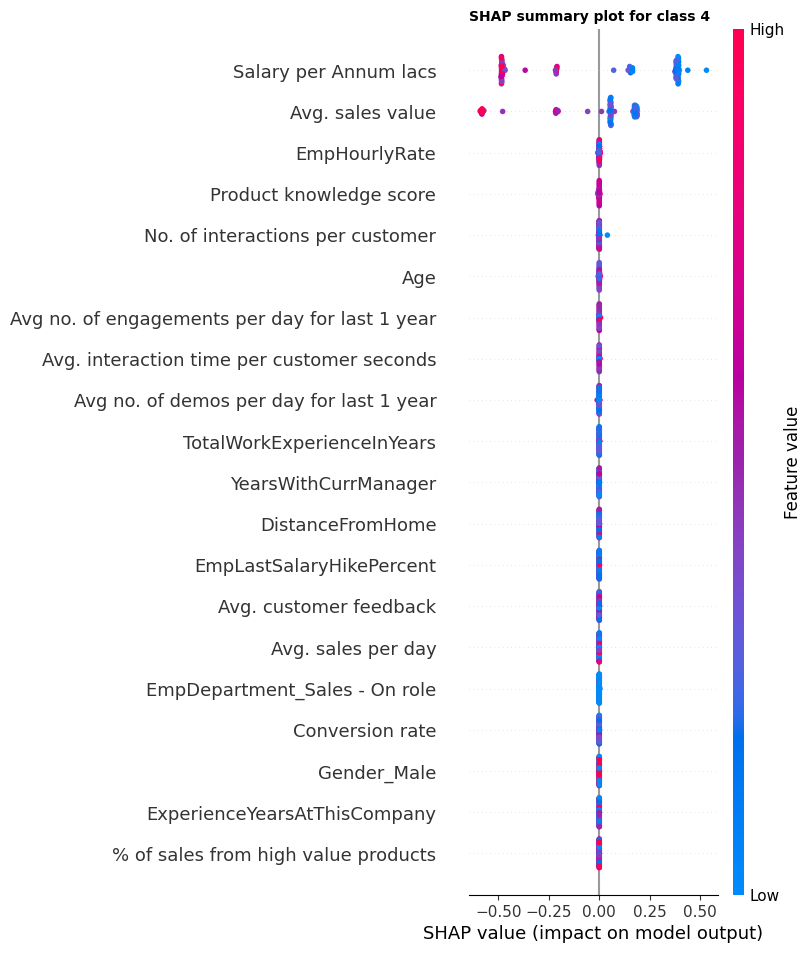

In [ ]:
for class_idx in range(5):
    shap.summary_plot(
        shap_values[:, :, class_idx],
        X_test_subset,
        feature_names=X_test_subset.columns.tolist(),
        plot_type='dot',
        show=False   # Prevents immediate display so you can customize
    )
    print("\n")
    plt.title(
        f"SHAP summary plot for class {class_idx}",
        fontsize=10,
        fontweight='bold',
        loc='left'
    )
    plt.show()


End of Code